## Import Libraries

In [ ]:
import numpy as np
from matplotlib import image
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import matplotlib.pyplot as plt
from scipy import signal
import time
import pandas as pd

## Loading image

In [ ]:
img = image.imread('Pink.jpg').astype('uint16')

In [ ]:
img.shape

(2016, 1512, 3)

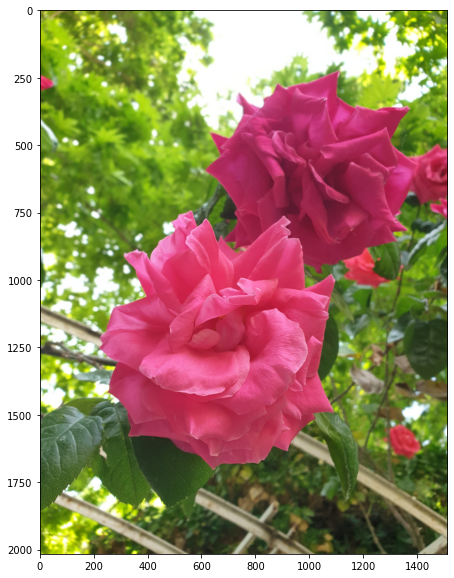

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img);

## Convolution

In [ ]:
box_filter = np.ones((3, 3))/9
box_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

### 1. Using Library

In [10]:
start_time = time.time()
res_1 = np.stack([signal.convolve2d(img[:, :, i], box_filter, mode='valid') for i in range(3)], axis=-1)
time_1 = time.time() - start_time
time_1

0.20897507667541504

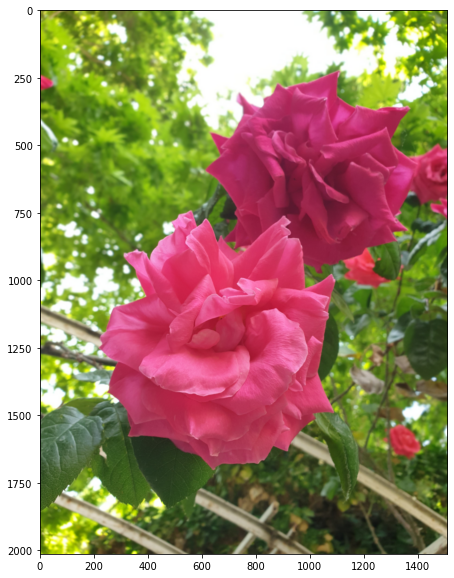

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(res_1.astype('int'));

### 2. 
Just simply slide the second image on the first image and calculate the cross correlation at every index $(i, j)$ (using two loops)

In [12]:
def custom_convolve2d(in1, in2):
    result = np.zeros((in1.shape[0]-in2.shape[0]+1, in1.shape[1]-in2.shape[1]+1))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i, j] = np.sum(in1[i:i+in2.shape[0], j:j+in2.shape[1]] * in2)
    
    return result

In [13]:
start_time = time.time()
res_2 = np.stack([custom_convolve2d(img[:, :, i], box_filter) for i in range(3)], axis=-1)
time_2 = time.time() - start_time
time_2

27.469207525253296

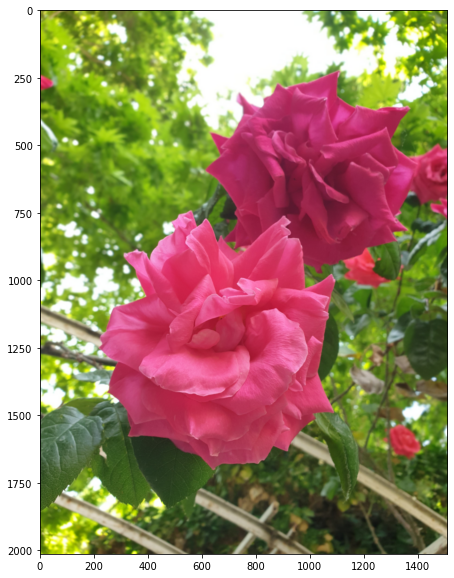

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(res_2.astype('int'));

### 3.
We can implement the convolution (or cross correlation) with another perspective. We can concider it as sum some matrices, that are $filter[i, j] \times M_{i,j}$ , in which $M_{i,j}$ is the submatrix that $filter[i, j]$ will be mulplied in, in the convolution operation.

For example: the cell with number `1`'s $M$ is the red submatrix below.

<table>
    <tr><td style='background: red; color: white'>1</td><td>2</td><td>3</td></tr>
    <tr><td>5</td><td>6</td><td>7</td></tr>
    <tr><td>8</td><td>9</td><td>10</td></tr>
</table>

<table>
    <tr><td style='background: red; color: white'>A</td><td style='background: red; color: white'>B</td><td style='background: red; color: white'>C</td><td>D</td><td>E</td></tr>
    <tr><td style='background: red; color: white'>F</td><td style='background: red; color: white'>G</td><td style='background: red; color: white'>H</td><td>I</td><td>J</td></tr>
    <tr><td style='background: red; color: white'>K</td><td style='background: red; color: white'>L</td><td style='background: red; color: white'>M</td><td>N</td><td>O</td></tr>
    <tr><td>P</td><td>Q</td><td>R</td><td>S</td><td>T</td></tr>
    <tr><td>U</td><td>V</td><td>W</td><td>X</td><td>Z</td></tr>
</table>

and for all other cells we can determine it's submatrix. Afterwards, we sum up these matrices together ($\sum filter[i, j] \times M_{i,j}$).

In [15]:
def custom2_convolve2d(in1, in2):
    result = np.zeros((in1.shape[0]-in2.shape[0]+1, in1.shape[1]-in2.shape[1]+1))
    for i in range(in2.shape[0]):
        for j in range(in2.shape[1]):
            result += in2[i, j] * in1[i:in1.shape[0]-in2.shape[0]+1+i, j:in1.shape[1]-in2.shape[1]+1+j]
    
    return result

In [16]:
start_time = time.time()
res_3 = np.stack([custom2_convolve2d(img[:, :, i], box_filter) for i in range(3)], axis=-1)
time_3 = time.time() - start_time
time_3

0.202988862991333

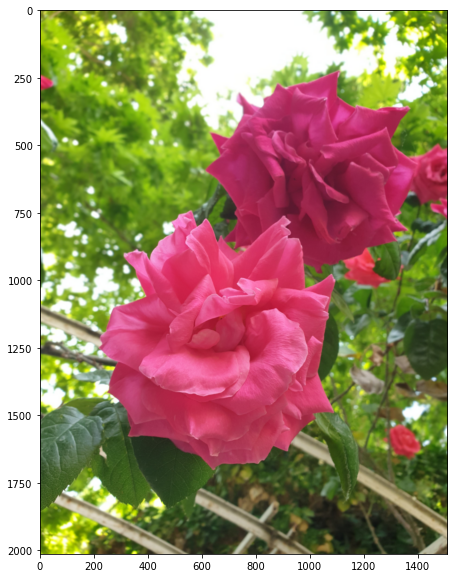

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(res_3.astype('int'));

**Check Equality**

In [18]:
def check_equality(img1, img2, error=1e-10):
    return np.all(img1 - img2 <= error)

In [19]:
check_equality(res_1, res_2), check_equality(res_2, res_3), check_equality(res_1, res_3)

(True, True, True)

### Comparing Times

In [20]:
pd.DataFrame([[time_1, time_2, time_3]], columns=[f'Method {i}' for i in range(1, 4)], index=['Time'])

,Method 1,Method 2,Method 3
Time,0.208975,27.469208,0.202989
